In [24]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [16]:
diabetes = load_diabetes()
print diabetes.data.shape

# Use only one feature
# diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data[:,2].reshape(-1, 1)
print diabetes_X.shape

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

(442, 10)
(442, 1)


[ 938.23786125]


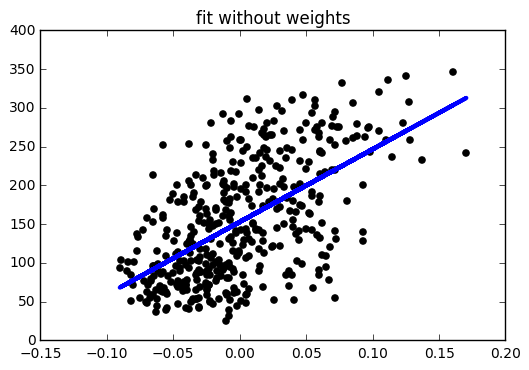

In [88]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
print regr.coef_

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, regr.predict(diabetes_X_train), color='blue',
         linewidth=3)
plt.title("fit without weights")

# now we add weights to the samples (similar to time effects)

(array([ 32.,  66.,  98.,  90.,  64.,  50.,  23.,  12.,   5.,   2.]),
 array([-0.0902753 , -0.06419224, -0.03810919, -0.01202614,  0.01405691,
         0.04013997,  0.06622302,  0.09230607,  0.11838912,  0.14447217,
         0.17055523]),
 <a list of 10 Patch objects>)

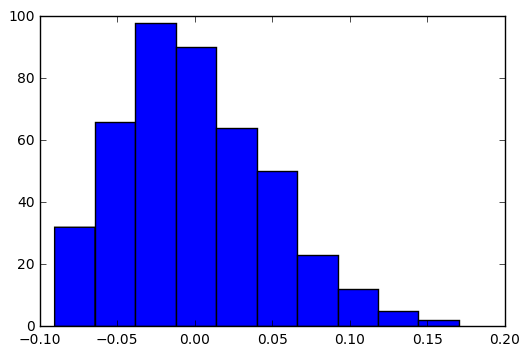

In [20]:
plt.hist(diabetes_X)

### create weights 

In the example, I am placing a lot more importance on the large samples

(array([ 115.,  137.,   68.,   50.,   29.,   11.,    5.,    5.,    0.,    2.]),
 array([  1.19477909,   5.39708927,   9.59939945,  13.80170964,
         18.00401982,  22.20633   ,  26.40864019,  30.61095037,
         34.81326056,  39.01557074,  43.21788092]),
 <a list of 10 Patch objects>)

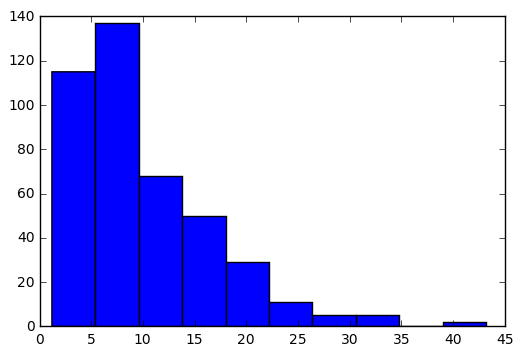

In [28]:
preprocessing = StandardScaler().fit(diabetes_X_train)
plt.hist((preprocessing.transform(diabetes_X_train) + 3) ** 2)

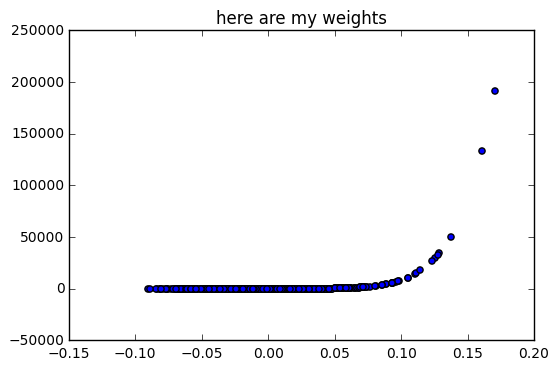

In [92]:
weights = (preprocessing.transform(diabetes_X_train) + 1) ** 8
plt.scatter(diabetes_X_train, weights)
plt.title("here are my weights")

[ 442.78711938]


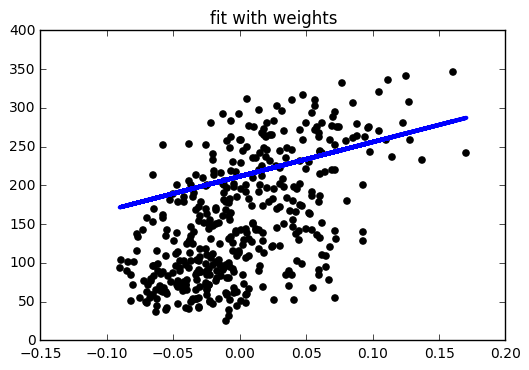

In [93]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train, sample_weight=weights.reshape(-1))
print regr.coef_

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, regr.predict(diabetes_X_train), color='blue',linewidth=3)
plt.title("fit with weights")